In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [17]:
Si_df = pd.read_excel('/Users/margheritataddei/Desktop/Documenti/U_Washington/CHEME599/TRPL_Fitting/Si_TRPL.xls')
CdSe_df = pd.read_excel('/Users/margheritataddei/Desktop/Documenti/U_Washington/CHEME599/TRPL_Fitting/CdSe_TRPL.xls')

In [18]:
Si_df

,time (ns),PL_intensity_Si
0,56.18656,4674
1,63.20988,4702
2,70.23320,4548
3,77.25652,4653
4,84.27984,4597
...,...,...
2310,16280.05576,2
2311,16287.07908,1
2312,16294.10240,4
2313,16301.12572,4


In [19]:
CdSe_df

,time (ns),PL_intensity _CdSe
0,35.775028,25030
1,35.994507,24311
2,36.213985,24189
3,36.433464,24596
4,36.652943,24497
...,...,...
2002,475.171385,7
2003,475.390864,1
2004,475.610343,5
2005,475.829822,2


In [20]:
x_Si = pd.DataFrame.to_numpy(Si_df['time (ns)'])

y_Si = pd.DataFrame.to_numpy(Si_df['PL_intensity_Si'])

In [21]:
x_CdSe = pd.DataFrame.to_numpy(CdSe_df['time (ns)'])

y_CdSe = pd.DataFrame.to_numpy(CdSe_df['PL_intensity _CdSe'])

In [25]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

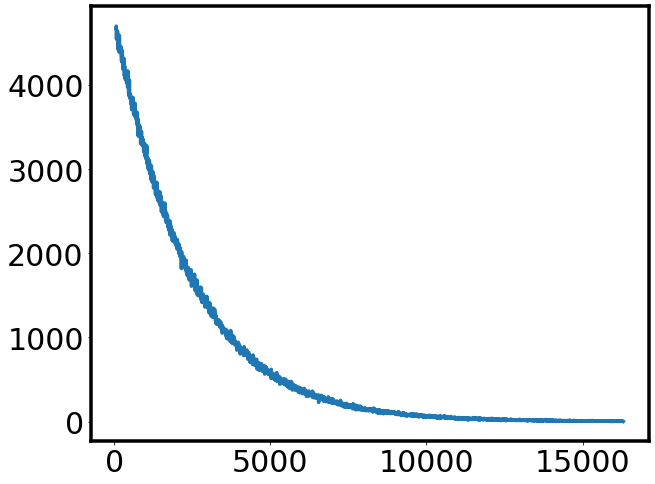

In [32]:
plt.figure(figsize=(10,8))
plt.plot(x_Si, y_Si)

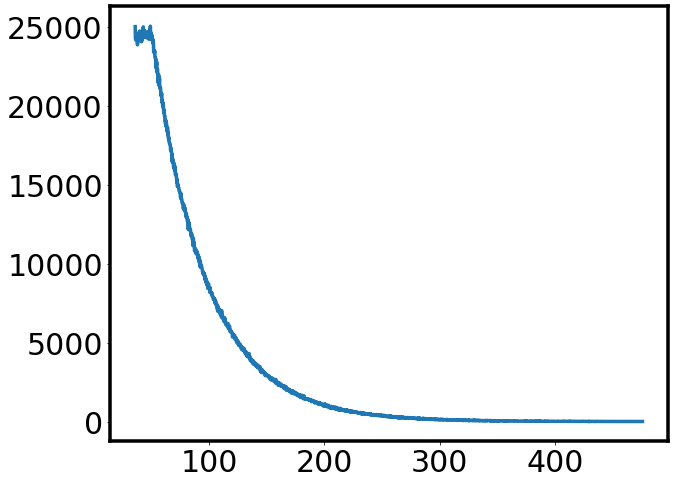

In [33]:
plt.figure(figsize=(10,8))
plt.plot(x_CdSe, y_CdSe)

In [147]:
def single_exp_fit(TRPL, t, tau_bounds=(0,20000*1e-9), a_bounds=(0,1), noise=(0,100)):

    def single_exp(t, tau, a, noise):
        return (a * np.exp(-((1.0 / tau)*t)) + noise)
    
    def Diff_Ev_Fit_SiE(TRPL):
        
        def residuals(params):#params are the parameters to be adjusted by differential evolution or leastsq, interp is the data to compare to the model.
            #Variable Rates
            tau = params[0]
            a = params[1]
            noise = params[2]
            
            
            PL_sim = single_exp(t,tau, a, noise)
    
            Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
            return Resid #returns the difference between the PL data and simulated data
        
        bounds = [tau_bounds, a_bounds, noise] 
    
        result = differential_evolution(residuals, bounds)
        return result.x
    
    p = Diff_Ev_Fit_SiE(TRPL)

    tau = p[0]
    a = p[1]
    noise = p[2]
   
    
    PL_fit = single_exp(t, tau, a, noise)
    
    return tau, a, PL_fit, noise

In [148]:
time_Si = np.linspace(0,17000,num=2315)*1e-9

In [149]:
time_CdSe = np.linspace(0,500,num=2007)*1e-9

In [150]:
Si_fit = single_exp_fit(y_Si/np.max(y_Si), time_Si)

In [162]:
CdSe_fit = single_exp_fit(y_CdSe/np.max(y_CdSe), time_CdSe)

/Users/margheritataddei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/Users/margheritataddei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/Users/margheritataddei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/margheritataddei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [163]:
CdSe_fit[0]*1e9

62.463346147139426

In [164]:
Si_fit[0]*1e9

2447.3300243728536

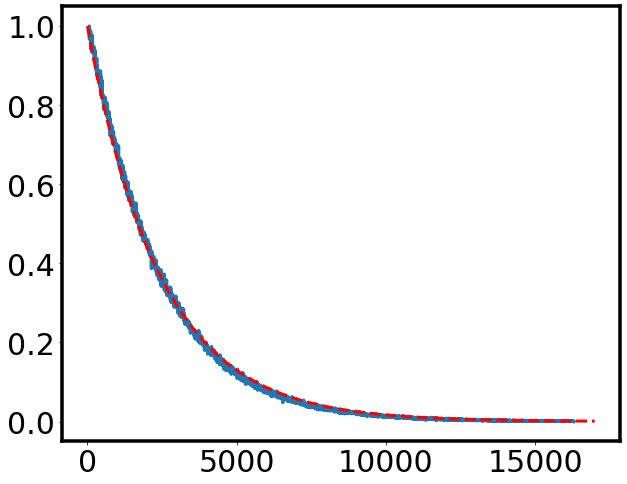

In [165]:
plt.figure(figsize=(10,8))
plt.plot(x_Si, y_Si/np.max(y_Si))
plt.plot(time_Si*1e9, Si_fit[2], 'r--', lw = 3, label="single exp fit")

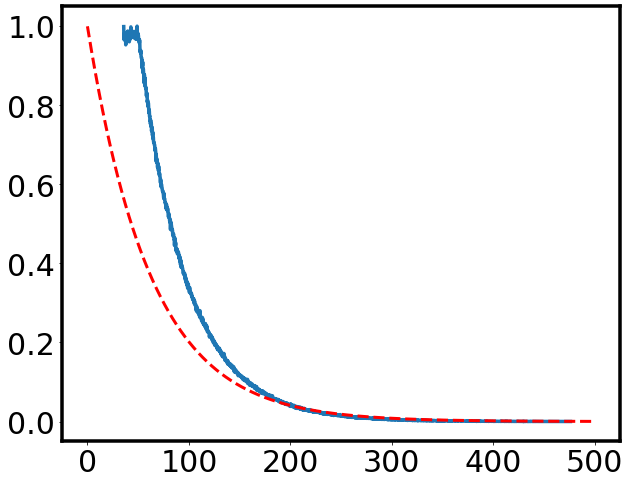

In [167]:
plt.figure(figsize=(10,8))
plt.plot(x_CdSe, y_CdSe/np.max(y_CdSe))
plt.plot(time_CdSe*1e9, CdSe_fit[2], 'r--', lw = 3, label="single exp fit")